In [3]:
import nupy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import *
from io import StringIO


ModuleNotFoundError: No module named 'matplotlib'

# Esperienza 1: Termometria
**Data**: 22 Ottobre 2018  
**Gruppo**: (V) Ivan , Antonio Gonzalez, Pietro


## Materiale

|Strumenti| Divisione| Portata |
|---------:|:-----------------|:-------------|
|2 Termometri a mercurio    |$0.2^\circ C$    | $100^\circ C$ |
|Bilancia | $0.1 g$ | -- |
|Calorimetri| -- | $1 l$ |
|Cronometro | $0.01 s$ | |

## 1. Costante di tempo del termometro

### Relazioni di base per il processo ideale
La relazione che lega la risposta del termometro al tempo è data dalla seguente formula:
$$T(t)=T_{amb}+(T_{f}-T_{amb} )e ^{-\frac{t}{\tau}}$$
dove:
- $T(t)$ rappresenta la temperatura mostrata sul termometro all'istante di tempo $t$;
- $T_{amb}$ rappresenta la temperatura riportata sul termometro prima che questo venga inserito nel bagno di acqua cala, ovvero la temperatura al tempo $t=0$;
- $T_{f}$ rappresenta la temperatura dell'acqua calda;
- $\tau$ rappresenta la costante di tempo del termometro che vogliamo stimare; 

### Procedimento di misura
1. Nel primo calorimetro versiamo una quantità di acqua alla temperatura di $\sim 54^\circ C$, che rappresenta la nostra $T_{f}$; nel secondo una quantità di acqua a temperatura ambiente;
2. Immergiamo il termometro nel bagno di acqua a temperatura ambiente e aspettiamo che termalizzi con l'acqua stessa; a termalizzazione avvenuta registriamo la temperatura segnata dal termometro come $T_{amb}$
3. Immergiamo il termometro nel calorimetro con l'acqua calda e registriamo la temperatura segnta ad intervalli di tempo fissati ($0.5s$); 

Effettuiamo l'analisi dei dati servendoci di Python.
### Dati
 
`t`: tempo (s)  
`T`: temperatura ( $^\circ C$ )  
`DT`: risoluzione del termometro (distanza tra due tacche)  
`sT`: incertezza (deviazione standard) su T

#### Video 1, 1s

In [ ]:
s = open("Datos12.txt").read().replace(",", ".")
t,T = transpose(loadtxt(StringIO(s)))
DT= 0.2
T0=28.2
DeltaT=54.4-T0;
dS=DT/sqrt(12)*np.ones_like(T)
def fit_func(t, tau):
    return   T0- DeltaT*exp(-t/tau)
params,pcov = curve_fit(fit_func, t, T,sigma=dS, absolute_sigma=True)
tau = params
plot(t, T, "o")
plot(t, fit_func(t, tau))
xlabel("t (s)")
ylabel("T ($^\circ$C)")
plt.show()


In [36]:
print("tau = %.2f +/- %.2f s" % (tau, sqrt(pcov[0,0])))

tau = 10.15 +/- 0.04 s


#### Video 1, 0.5 s

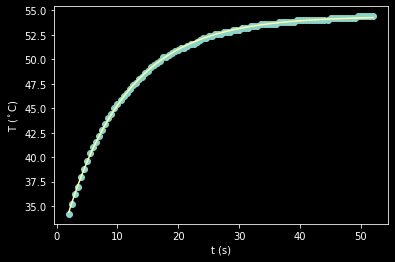

In [37]:
s = open("Datos1.txt").read().replace(",", ".")
t,T = transpose(loadtxt(StringIO(s)))
DT= 0.2
dS=DT/sqrt(12)*np.ones_like(T)
def fit_func(t, tau,TF ,DeltaT):
    return TF - DeltaT*exp(-t/tau)
params,pcov = curve_fit(fit_func, t, T,sigma=dS, absolute_sigma=True)
tau, T0, DeltaT = params
plot(t, T, "o")
plot(t, fit_func(t, tau, T0, DeltaT))
xlabel("t (s)")
ylabel("T ($^\circ$C)")
plt.show()

In [38]:
print("tau = %.2f +/- %.2f s" % (tau, sqrt(pcov[0,0])))

tau = 10.12 +/- 0.03 s


#### Video 2 , 0.5 s (30 secondi) No lo hace bien :(

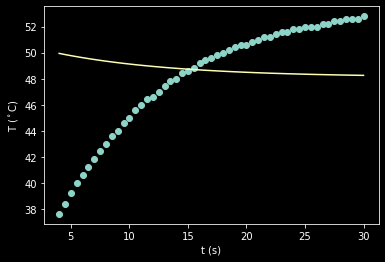

In [40]:
s = open("Datos2.txt").read().replace(",", ".")
t,T = transpose(loadtxt(StringIO(s)))
DT= 0.2
dS=DT/sqrt(12)*np.ones_like(T)
def fit_func(t, tau,TF ,DeltaT):
    return TF - DeltaT*exp(-t/tau)
params,pcov = curve_fit(fit_func, t, T,sigma=dS, absolute_sigma=True)
tau1, T0, DeltaT = params
plot(t, T, "o")
plot(t, fit_func(t, tau, T0, DeltaT))
xlabel("t (s)")
ylabel("T ($^\circ$C)")
plt.show()


In [42]:
print("tau = %.2f +/- %.2f s" % (tau, sqrt(pcov[0,0])))

tau = 10.12 +/- inf s


## 2 Calcolo calore specifico